# RBB: Determine the collective adaption strategies

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of government agents' collective adaptation to flood events in a social network context. The determine of the collective adaptation strategies are based on the FN value (directly related to the fatalities). The model serves as a template and RBB for government's decision according to the fatalities, which can be measured by the flood depth.

This directory is structured as follows:
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `CollectiveAdaptationModel` is defined in `RBBmodel.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each government agent in the model represents a local government with attributes and behaviors that determine the collective flood adaptiontion strategies. The flood depth attribute assigned to each government is currently random for demonstration purposes, and user may change it when use RBB. The decision by government  is also arbitrary (only contains weak or strong collective strategies for now). In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms and standards.

The current implementation includes several simplifications and only government agents has been considered in the RBB, such as random flood depths and basic collective adaptation decision logic. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices. Also, for now, all the parameters are based on the minimal model (Harris County), if the user wants to use it for other cases, go to `agents.py` and `Government`, you can change the parameters there, affected population, exposure rate, APE for instance.

In the big assignment model, this RBB will be used to determine the collective adaption strategies and will have a effect on householders' adaptation.

Besides, due to the group are all new user of python, this code are not fancy, please fogive us about this.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-1-22 with Mesa version 2.1.4 on Python 3.9.12_

# Running the model and visualizing the model domain and social network over time

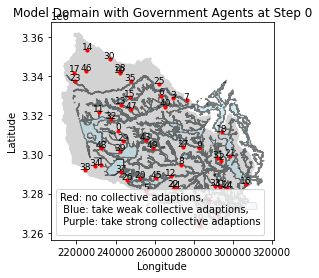

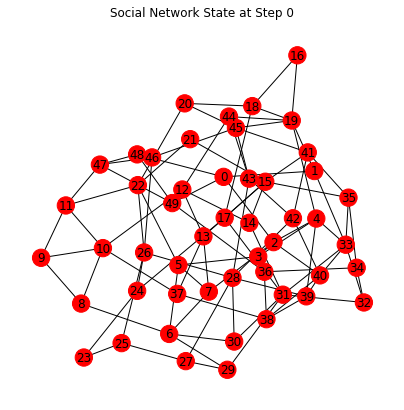

<Figure size 3600x3600 with 0 Axes>

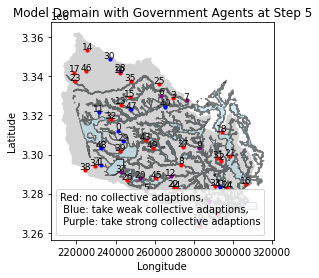

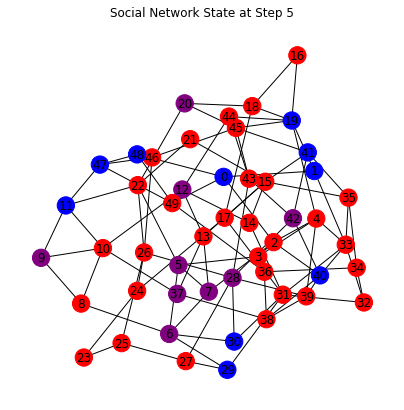

<Figure size 3600x3600 with 0 Axes>

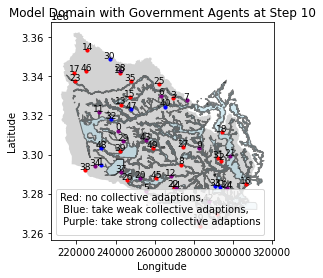

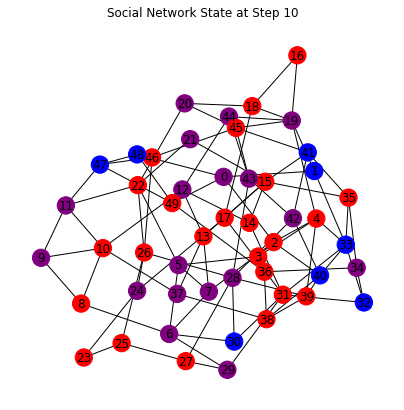

<Figure size 3600x3600 with 0 Axes>

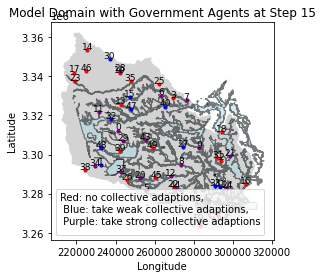

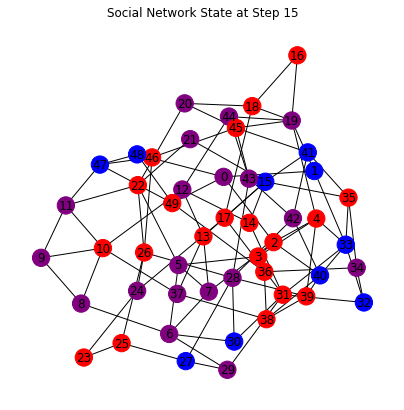

<Figure size 3600x3600 with 0 Axes>

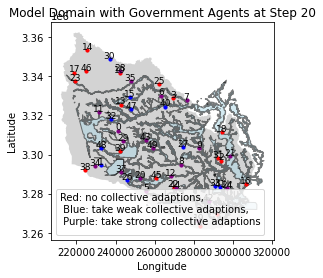

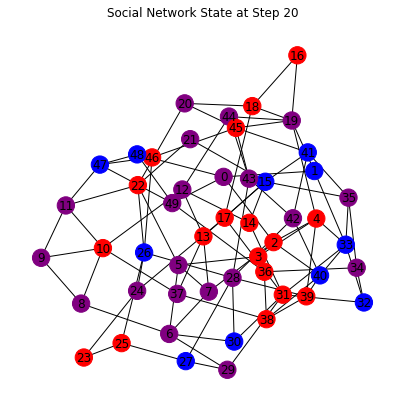

In [1]:
from RBBmodel import CollectiveAdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import random

# Initialize the Adaptation Model with 50 household agents.
model = CollectiveAdaptationModel(number_of_government=50, flood_map_choice="harvey", network="watts_strogatz",APE=random.uniform(0.0005, 0.001),
                                  affected_population= 94623,exposure_rate=0.1,c=0.031383,a=1.5,) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.weak_collective_adaption and agent.strong_collective_adaption == False else 'purple' if agent.strong_collective_adaption else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(50, 50))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

Weakadaptation  Strongadaptation  \
Step AgentID                                     
0    0                 False             False   
     1                 False             False   
     2                 False             False   
     3                 False             False   
     4                 False             False   
...                      ...               ...   
19   45                False             False   
     46                False             False   
     47                 True             False   
     48                 True             False   
     49                 True              True   

                                                   location  
Step AgentID                                                 
0    0         POINT (241371.31991120926 3312224.748569721)  
     1        POINT (232688.85641560075 3294468.8756794347)  
     2          POINT (294160.579507224 3296934.2036072062)  
     3          POINT (269326.6451485793 3328730.826529002)  
     4          POINT (282973.964745497 3263515.5182407466)  
...                                                     ...  
19   45         POINT (260697.7969260179 3287937.373327306)  
     46       POINT (224883.03849049134 3342663.4682134455)  
     47       POINT (247875.82932272682 3323060.9060232625)  
     48       POINT (232640.04777992077 3303232.8828269397)  
     49        POINT (259012.77172655665 3303461.475452438)  

[1000 rows x 3 columns]

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_collective_adaptations,weak_collective_adaptations,strong_collective_adaptations
0,0,0,0
1,5,5,2
2,10,10,4
3,15,15,6
4,17,17,7
5,19,19,9
6,20,20,10
7,22,22,13
8,23,23,14
9,26,26,15
